In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import seaborn as sns

### Config

In [2]:
folder_path = "speedups.csv"
data_dict = {}

### Load Data

In [3]:
df = pd.read_csv(folder_path, header=None, names=['name', 'value'])

for _, row in df.iterrows():
    match = re.match(r"([^-]+)-([^.]+).raw", row['name'])
    if match:
        category, test = match.groups()
        value = row['value']
        value = value.strip()
        t = datetime.strptime(value,'%Mm%S.%fs') 
        total_seconds = t.minute * 60 + t.second + t.microsecond/1000000

        if test not in data_dict:
            data_dict[test] = {}
        data_dict[test][category] = total_seconds

speedups_table = pd.DataFrame(data_dict).T

In [4]:
speedups_table

,blackscholes,canneal,dedup,ferret,freqmine,radix,vips
1,0.826,8.554,21.040,3.395,6.193,58.135,103.852
2,0.489,7.798,18.105,3.132,5.686,39.252,53.069
4,0.318,7.035,10.170,1.572,2.256,14.870,28.525
8,0.255,7.124,16.538,1.600,1.727,9.942,23.647


In [5]:
### Normalize data with respect to 1 Thread
normalized_speedups = speedups_table.iloc[0].div(speedups_table)

In [6]:
normalized_speedups

,blackscholes,canneal,dedup,ferret,freqmine,radix,vips
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.689162,1.096948,1.162110,1.083972,1.089166,1.481071,1.956924
4,2.597484,1.215920,2.068830,2.159669,2.745124,3.909549,3.640736
8,3.239216,1.200730,1.272222,2.121875,3.585987,5.847415,4.391762


### Plot 2b

Index(['1', '2', '4', '8'], dtype='object')
Index(['1', '2', '4', '8'], dtype='object')
Index(['1', '2', '4', '8'], dtype='object')
Index(['1', '2', '4', '8'], dtype='object')
Index(['1', '2', '4', '8'], dtype='object')
Index(['1', '2', '4', '8'], dtype='object')
Index(['1', '2', '4', '8'], dtype='object')


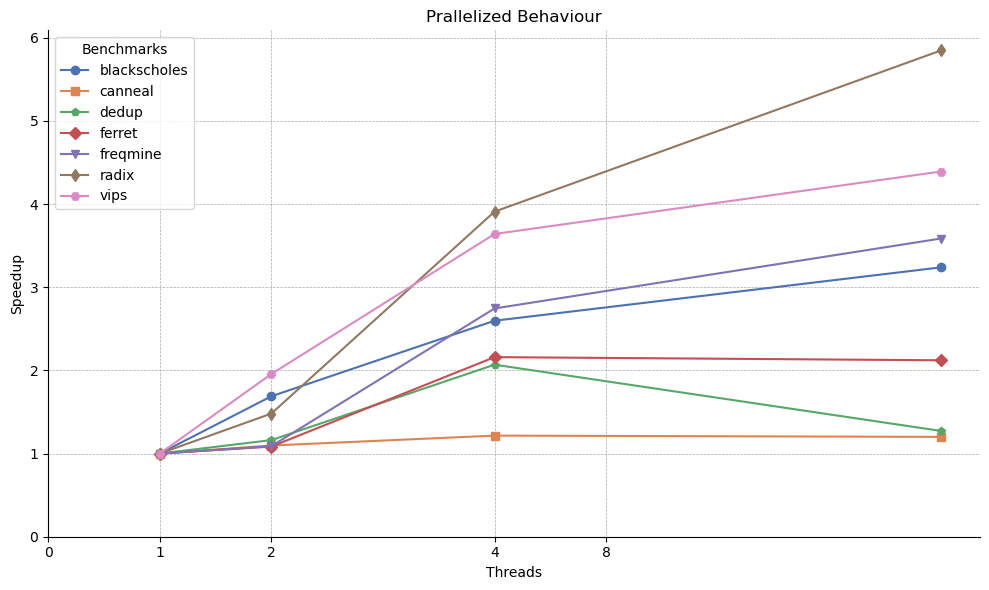

In [24]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Seaborn colors
colors = sns.color_palette("deep", 7)
ax.set_prop_cycle('color', colors)
markers = ['o', 's', 'p', 'D', 'v', 'd', 'H']

i=0
for column in normalized_speedups.columns:
    plt.plot(list(map(int, normalized_speedups.index)), normalized_speedups[column], marker=markers[i], label=column)
    i+=1

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
x_labels = ['0', '1', '2', '4', '8']
ax.set_xticks([0, 1, 2, 4, 5], x_labels)
y_labels = ['0', '1', '2', '3', '4', '5', '6']
ax.set_yticks(range(0, 7, 1), y_labels)
ax.set_facecolor('white')
ax.legend(title='Benchmarks')
ax.grid(True, color='darkgrey', linestyle='--', linewidth=0.5)
ax.set_xlabel('Threads')
ax.set_ylabel('Speedup')
ax.set_title('Prallelized Behaviour')
fig.tight_layout()

# Show plot
plt.show()